## How not to feel bored – 2

### Библиотека для символьных вычислений `sympy`: продолжение

### Интегралы в `sympy` 

Для начала импортируем библиотеку (если ещё не работали с `sympy`, см. обзор [здесь](https://github.com/allatambov/py-icef/blob/master/add/sympy-1.ipynb)) и определим символы для переменных, с которыми будем работать.

In [1]:
from sympy import *
x, y = symbols("x y")

Найдём неопределённый интеграл от какой-нибудь функции. Зададим саму функцию и выведем её в красивом свёрстанном виде:

In [6]:
init_printing()
fx = 1 / (2 * x)
fx

Вычислим интеграл (в `sympy` константа $C$ в неопределённых интегралах будет опускаться):

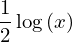

In [18]:
integrate(fx, x)

Или что-то более сложное:

$f(x) = \dfrac{1}{1+x^2}$

In [19]:
integrate(1 / (1 + x ** 2), x)

$f(x) = \sin(x) + \cos(x) \cdot e^x$

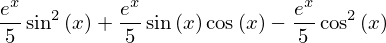

In [20]:
integrate(sin(x) * cos(x) * exp(x), x)

А теперь посчитаем определённый интеграл. Для этого достаточно дописать границы отрезка, на котором мы интегрируем, внутри функции `integrate()`:

In [21]:
integrate(log(x), (x, 1, 2))

**Обратите внимание:** в таком случае все аргументы функции вводятся в круглых скобках – они должны быть оформлены в кортеж (*tuple*). Пример кортежа:

In [16]:
t = (2, 5, 10) 
t

Иначе ничего не получится:

In [22]:
integrate(log(x), x, 1, 2)

ValueError: Invalid limits given: (x, 1, 2)

А теперь рассмотрим какой-нибудь несобственный интеграл, например, интеграл, где оба предела интегрирования стремятся к $\pm \infty$:

In [25]:
integrate(1 / (1 + x ** 2), (x, -oo, oo))

**Примечание:** символ для бесконечности немного нетривиальный – проще всего его просто скопировать из какой-нибудь документации `sympy` (если под рукой нет готового файла).

**Интересный факт:** вместо готового значения можно вывести само выражение для интегрирования:

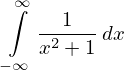

In [27]:
Integral(1 / (1 + x ** 2), (x, -oo, oo))  # Integral vs integrate

Про особенности вычисления интегралов в `sympy` можно почитать [здесь](https://docs.sympy.org/latest/modules/integrals/integrals.html), раздел *API Reference*.

### Пределы в `sympy`

Посчитаем предел функции $f(x) = e^{-x}$ при $x \to \infty$:

In [32]:
Limit(exp(-x), x, oo)  # пока само выражение

In [33]:
limit(exp(-x), x, oo) # результат

А что, если предел равен бесконечности? Проверим:

In [34]:
limit(exp(-x), x, -oo)  # и правда

А если предела не существует совсем (даже не-конечного)?

In [41]:
limit(sin(1/x), x, 0) # странный ответ, попробуйте понять, почему

`Sympy` также умеет вычислять односторонние пределы:

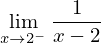

In [69]:
Limit(1 / (x - 2), x, 2, '-') # левосторонний предел

In [68]:
limit(1 / (x - 2), x, 2, '-') # вычисляем

In [ ]:
Limit(1 / (x - 2), x, 2, '+') # правосторонний предел

In [ ]:
limit(1 / (x - 2), x, 2, '+') # вычисляем

### Немного про матрицы в `sympy`

Создадим матрицу `M` и посмотрим на неё:

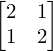

In [60]:
M = Matrix([[2, 1], [1, 2]])
M

Найдём обратную матрицу:

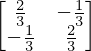

In [73]:
M.inv()

Найдём её ранг:

In [74]:
M.rank() # в данном случае ожидаемо, что он равен 2

Посчитаем собственные значения матрицы `M`:

In [61]:
M.eigenvals() # два значения: 1 и 3

И собственные векторы (какие-нибудь):

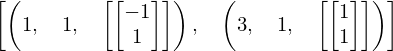

In [62]:
M.eigenvects() # два собственных вектора

Приведём матрицу к диагональному виду:

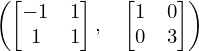

In [63]:
M.diagonalize()

Почему результат включает две матрицы? Вторая матрица – это итоговая диагональная матрица, а первая – это матрица $P$ отсюда:

$$
M=PDP^{−1} 
$$

**Примечание:** $M$ – это наша исходная матрица, $D$ – диагоналльная матрица.

Можем извлечь диагональную матрицу из полученного кортежа:

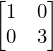

In [70]:
M.diagonalize()[1]  # второй элемент – элемент с индексом 1

Или используем множественное присваивание:

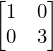

In [71]:
P, D = M.diagonalize()
D

Можем разложить матрицу, выбрав определённый метод разложения. Например, выберем LU-разложение, то есть представим матрицу `M` в виде произведения нижней треугольной матрицы (*Lower*) и верхней треугольной матрицы (*Upper*): 

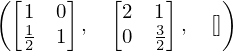

In [64]:
M.LUdecomposition()

Проверим, что всё работает корректно – перемножим матрицы из выдачи выше. Опять извлечём первые две матрицы из кортежа:

In [78]:
L, U, N = M.LUdecomposition()  # N - просто так, пустая матрица

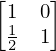

In [79]:
L

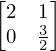

In [80]:
U

Перемножим и сравним:

In [82]:
L * U == M  # действительно

True

### Задания 

### Задача 1

Вычислите с помощью `sympy` пределы 1, 7, 10, 12, 13 [отсюда](http://tutorial.math.lamar.edu/Problems/CalcI/ComputingLimits.aspx) и сравните результаты с предложенными решениями. Всегда ли `sympy` корректно возвращает результат (особенно интересуют случаи, когда предел равен $\pm\infty$ или не существует).

**Подсказка:** кусочно-заданную функцию можно определить с помощью функции `Piecewise()`. Пример:

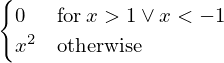

In [84]:
Piecewise((0, x < -1),
    (0, x > 1),
    ( (x ** 2, True)))

### Задача 2

Вычислите следующие неопределённые и определённые интегралы:

* $\int(\sin\pi x) dx$
* $\int\frac{x^2}{\sqrt{1-x}} dx$
* $\int\limits_1^2\tan(x^2) dx$

### Задача 3

1. Найдите собственные значения матрицы `A` в общем виде (считая, что `a` и `b` – это какие-то числа):

$$
\begin{pmatrix}
a & 3 \\
7 & b
\end{pmatrix}
$$

2. Извлеките полученные на предыдущем шаге собственные значения из словаря так, чтобы с ними можно было работать по отдельности (сохраните первое как `lamda1`, второе – как `lamda2`. Вычислите значения `lamda1` и `lamda2`, считая, что $a=5$, $b = 7$.

3. Найдите собственные вектора матрицы `A` в общем виде (считая, что `a` и `b` – это какие-то числа). Покажите, что эти вектора перпендикулярны друг другу. 

**Подсказка:** Для этого погуглите или посмотрите в документации `sympy`, как считать скалярное произведение векторов.